<a href="https://colab.research.google.com/github/maplerivertree/notes-9781787125933/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data', header = None)
df[0:4]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [0]:
#------------------------
import numpy as np

class Perceptron(object):
    """Perceptron classifier
    
    Parameters
    ---------
    eta : float
        Learning rate  (0-1)
    n_iter: interations
        passes over the training datasets
    random_state: int
        Random number generator seed for ranom weight
        initialization
        
    Attributes
    ---------
    w_ : 1d-array
        wdights after fitting
    errors_ : list
        number of misclassifications (updates) in each epoch
    """

    def __init__(self, eta = 0.01, n_iter = 50, random_state = 821150):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        ----------
        
        X: {array-like}, shape = [n_samples, n_features]
        
        y: {array-like}, shape = [n_samples]
            target values
            
        Returns:
        -----------
        self: object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale=  0.01, size = 1 + X.shape[1])
        #https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.RandomState.normal.html#numpy.random.RandomState.normal
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                # self.w_[0] is inserted as the bias units (additional feature/column)
                errors += int(update !=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:] ) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        #https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html
        

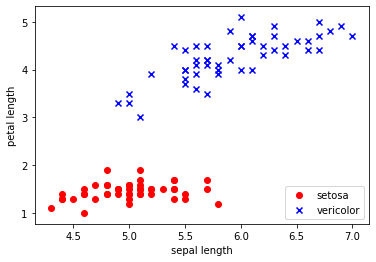

<function matplotlib.pyplot.show>

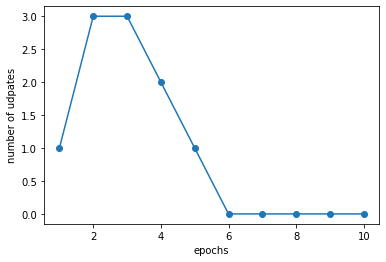

In [42]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label ='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label ='vericolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'lower right')
plt.show()

ppn = Perceptron(eta = 0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('number of udpates')
plt.show

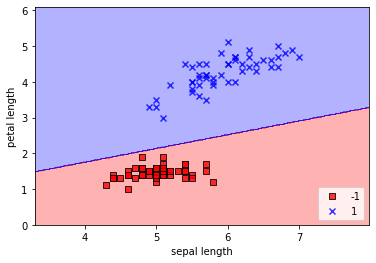

In [56]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):

  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() +1
  x2_min, x2_max = X[:,1].min() -1, X[:, 1].max() +1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  z = classifier.predict(np.array(np.array([xx1.ravel(), xx2.ravel()]).T))
  z = z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], 
                y=X[y == cl, 1],
                alpha= 0.8,
                c =colors[idx], 
                marker = markers[idx],
                label = cl, 
                edgecolor = 'black')


plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'lower right')
plt.show()